# Objetivo y descripción del conjunto de datos
El **conjunto de datos** contiene información de una encuesta de satisfacción realizada a los pasageros de una aerolínea. Con estos datos podemos analizar cuales son los *factores* que más relacionados están con un pasajero satisfecho o insatisfecho. La descripción de las columnas es la siguiente:
- **Género**: género del pasajero (Hombre, Mujer)
- **Tipo de cliente**: cliente leal o desleal
- **Edad**: edad del pasajero
- **Tipo de viaje**: objetivo del viaje (negocios, personal, ...)
- **Distancia del viaje**
- **Servicio Wifi**: nota del 1 al 5 con la satisfacción del servicio wifi
- **Hora de salida y llegada convenientes**: nota de 1 al 5 con la satisfacción
- **Satisfacción con la reserva online**: nota del 1 al 5
- **Localización puerta embarque**: nota del 1 al 5
- **Comida y bebida del vuelo**: nota del 1 al 5
- **Satisfacción con página web (online boarding)**: nota del 1 al 5
- **Comodidad del sitio en el avión**: nota del 1 al 5
- **Entretenimiento en el avión**: nota del 1 al 5
- **Servicio en el vuelo**: nota del 1 al 5
- **Espacio para las piernas en el vuelo**: nota del 1 al 5
- **Satisfacción con el tratamiento del equipaje**
- **Servicio de check-in**
- **Servicio en el vuelo**
- **Limpieza**: nota del 1 al 5
- **Retraso de la salida del vuelo en minutos**: cuanto se retraso el vuelo
- **Retraso de la llegada del vuelo en minutos**: cuanto se retrasó en llegar
- **Nivel de satisfacción**: Satisfecho o (neurtral o disatisfecho)

El objetivo será hacer un análisis exploratorio de datos para entender que variables afectan más al nivel de satisfacción. Finalmente construimos un modelo de **aprendizaje supervisado** usando el algoritmo de la *regresión logística* para predecir si un pasajero quedará satisfecho o no.


### Importamos librerías.

In [1]:
# Pandas para manejo de datos tabulares
import pandas as pd 

# Con esto podremos ver más columnas de nuestro df
pd.set_option("display.max_columns", 500)

# Numpy para operaciones matemáticas
import numpy as np

# Librerías de representaciones gráficas.
import matplotlib.pyplot as plt
import seaborn as sns

### Análisis de missigns y duplicados.
Se guardará el *conjunto de datos* en la variable `df` se analizará si hay datos faltantes y si hay filas duplicadas.

In [2]:
# Guardamos conjunto de datos
df = pd.read_csv("ariline_passenger_satisfaction.csv")

# Eliminamos columna id que no aporta información
df = df.drop("id", axis=1)

# Imprimos número de filas y de columnas y vemos las 5 primeras filas.
print(f"Hay {df.shape[0]} filas y {df.shape[1]} columnas en el dataset")
df.head()

Hay 623 filas y 23 columnas en el dataset


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,53,Business travel,Business,1587,1,1,1,1,4,5,5,5,5,5,5,3,5,5,2,0.0,satisfied
1,Female,Loyal Customer,56,Business travel,Business,2843,1,1,1,1,4,4,5,4,4,4,5,5,4,4,2,0.0,satisfied
2,Male,Loyal Customer,59,Business travel,Eco,756,3,3,3,3,4,3,4,4,2,4,2,2,1,4,0,0.0,neutral or dissatisfied
3,Female,Loyal Customer,32,Business travel,Business,2560,1,1,1,1,5,5,5,5,3,3,3,2,1,5,0,0.0,satisfied
4,Male,Loyal Customer,12,Business travel,Business,1563,1,1,1,1,5,5,5,5,4,3,5,5,4,5,5,2.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             623 non-null    object 
 1   Customer Type                      623 non-null    object 
 2   Age                                623 non-null    int64  
 3   Type of Travel                     623 non-null    object 
 4   Class                              623 non-null    object 
 5   Flight Distance                    623 non-null    int64  
 6   Inflight wifi service              623 non-null    int64  
 7   Departure/Arrival time convenient  623 non-null    int64  
 8   Ease of Online booking             623 non-null    int64  
 9   Gate location                      623 non-null    int64  
 10  Food and drink                     623 non-null    int64  
 11  Online boarding                    623 non-null    int64  

La mayoría de las columnas son de tipo numérico.

In [4]:
n_duplicados = df.duplicated().sum()
print(f"Tenemos {n_duplicados} filas duplicadas.")

# Guardamos columnas con null values.
col_con_NaN = [col for col in df.columns if df[col].isnull().sum()>0]
print(f"Estas columnas tienen al menos un NaN value: {col_con_NaN}")

Tenemos 0 filas duplicadas.
Estas columnas tienen al menos un NaN value: ['Arrival Delay in Minutes']


In [5]:
# Número de null values en la columna.
n_nan = df[col_con_NaN].isnull().sum()[0]
print(f"Tenemos {n_nan} valores nulos en {col_con_NaN}")

Tenemos 1 valores nulos en ['Arrival Delay in Minutes']


Como solo hay un valor nulo en la columna de *retraso en la llegada* parece razonable rellenar dicho valor con la media de minutos de retraso en las llegadas que tuvieron en los otros vuelos.

In [6]:
# Calculamos la media y rellenamos NaN value con fillna()
media_retraso_llegada = df[col_con_NaN].mean()
df[col_con_NaN] = df[col_con_NaN].fillna(media_retraso_llegada)

# Imprimos información de utilidad en pantalla
print("Hemos solucionado el problema de los missing values")
print("Aquí tenemos el número de valores nulos que hay en cada columna:")
df.isnull().sum()

Hemos solucionado el problema de los missing values
Aquí tenemos el número de valores nulos que hay en cada columna:


Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Columnas numéricas vs satisfacción
Ahora se analizará que relación guardan las columnas numéricas del *dataset* con la variable *target* que recuerda que es la de **satisfaction**. Usaremos gráficos de barras para mostrar la media de cada variable numérica según las dos categorías de la variable **satisfaction**. También se analizará si la diferencia en las medias es *estadística significativ* y se usarán histogramas y *boxplots* para visualizar las distribuciones de las variables según las categorías de **satisfaction**.

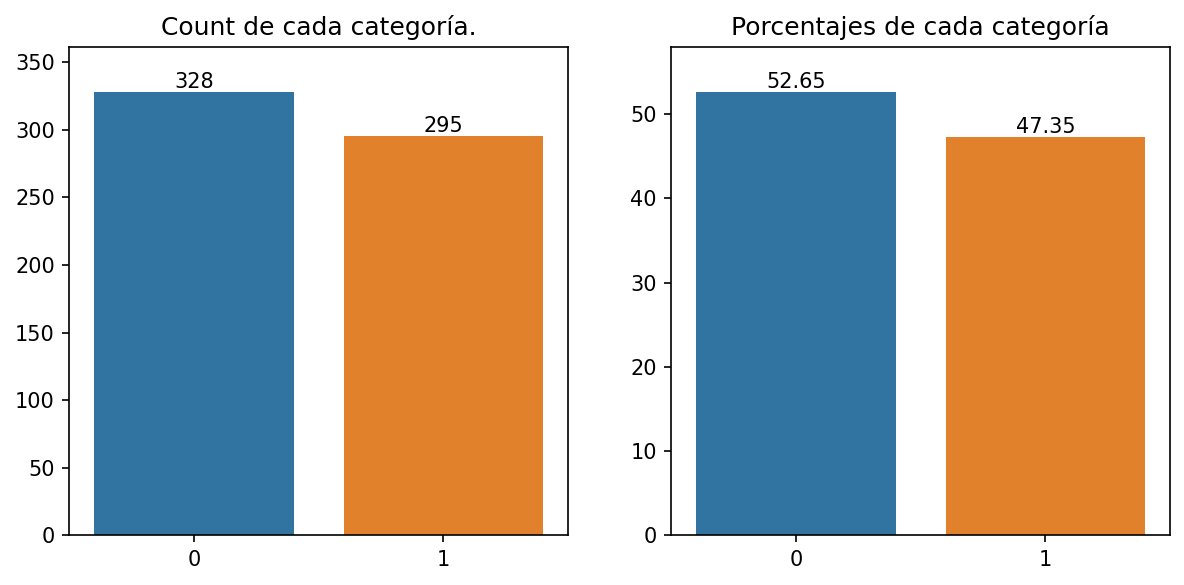

In [7]:
from utils_log import barplot_category_counts_percentages

target = "satisfaction"  # Variable objetivo: "satisfaction".

# Convertir "satisfaction" a valores binarios: 1 si "satisfied", 0 si no.
df[target] = df[target].apply(lambda value: 1 if value == "satisfied" else 0)

# Mostrar gráfico barras: conteo y porcentaje de cada categoría en "satisfaction".
barplot_category_counts_percentages(df[target])

Vemos que hay un 52% de clientes que no están satisfechos y un 47% que sí lo están, por tanto, podemos concluir que la variable está bien **balanceada**, es decir, no hay una categoría que sea muy mayoritaría

In [8]:
# Imprime la correlación entre las variables numéricas y la variable objetivo.
corr_info_target = df.corr(numeric_only=True)[target].sort_values(ascending=False)
print(corr_info_target, "\n")

# Obtiene las 6 variables más correlacionadas con la target.
more_corr_vars = list(corr_info_target.index[1:7])
print(f"Las 6 variables más correlacionadas con la target son:")
print(more_corr_vars)

satisfaction                         1.000000
Online boarding                      0.491373
Seat comfort                         0.371185
Inflight entertainment               0.338458
Flight Distance                      0.293070
Cleanliness                          0.286646
Checkin service                      0.264483
Leg room service                     0.240554
Food and drink                       0.227216
On-board service                     0.220641
Inflight wifi service                0.187305
Baggage handling                     0.150277
Age                                  0.142613
Inflight service                     0.118260
Ease of Online booking               0.107259
Arrival Delay in Minutes            -0.069930
Departure/Arrival time convenient   -0.070536
Departure Delay in Minutes          -0.074260
Gate location                       -0.085269
Name: satisfaction, dtype: float64 

Las 6 variables más correlacionadas con la target son:
['Online boarding', 'Seat comfort'

**online_boarding** es la variable numérica que más realación guarda con la *target*. Vamos a calcular la media de esta variable según las categorías de *satisfaction* y vamos a representar dichas medias y la diferencia entre ellas usando un *gráfico de barras*.

            Online boarding
Mean 1             3.952542
Mean 0             2.603659
Diferencia         1.348884


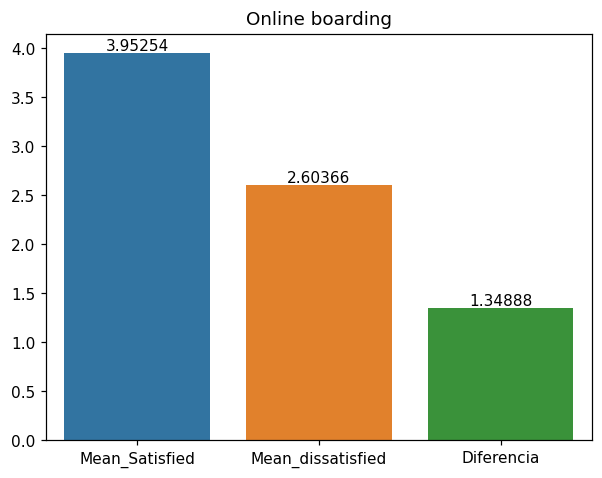

In [9]:
from utils_log import calculate_difference_in_means

# Calcular la diferencia en las medias para la variable numérica y la target.
infor_means = calculate_difference_in_means(df["Online boarding"], df[target])
print(infor_means)

# Generar un gráfico de barras
plt.figure(dpi=110)
bar = sns.barplot(x=["Mean_Satisfied", "Mean_dissatisfied", "Diferencia"], 
                  y=infor_means["Online boarding"].values)

# Agregar etiquetas con las medias a las barras del gráfico.
bar.bar_label(bar.containers[0])

# Asignar título al gráfico con el nombre de la variable numérica.
bar.set_title("Online boarding");

Como vemos la diferencia entre ambos grupos es bastante notoria.

Recuerda que las 6 variables más correlacionadas con la target eran:
['Online boarding', 'Seat comfort', 'Inflight entertainment', 'Flight Distance', 'Cleanliness', 'Checkin service']


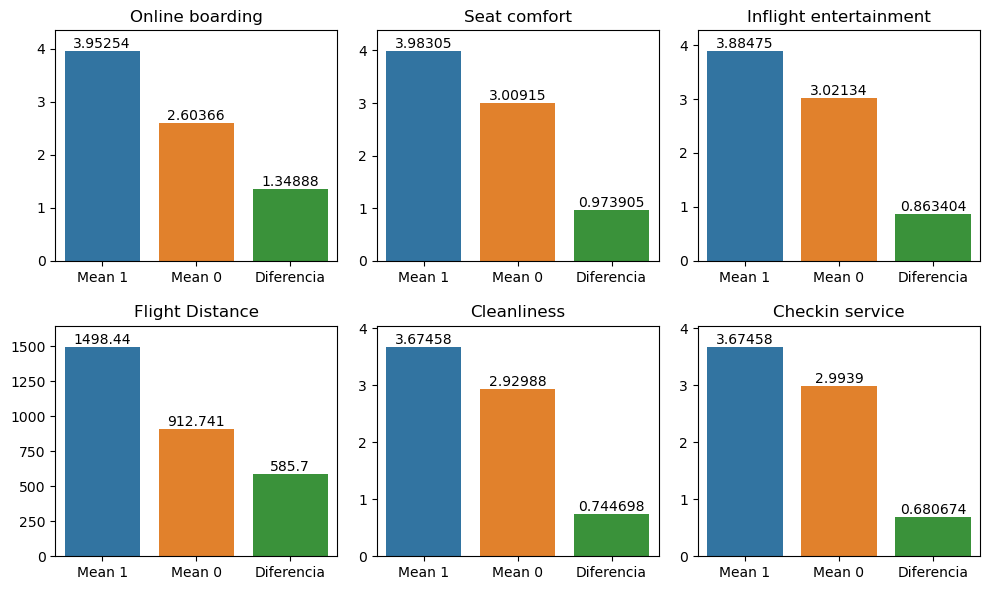

In [10]:
# Imprime las 6 variables más correlacionadas con la variable objetivo.
print("Recuerda que las 6 variables más correlacionadas con la target eran:")
print(more_corr_vars)

# Importa la función "plot_means_with_differences" desde el módulo "utils_log".
from utils_log import plot_means_with_differences

# Prepara las listas de columnas numéricas y la variable objetivo.
numeric_cols = [df[col] for col in more_corr_vars]
target_col = df[target]

# Genera el gráfico de medias con diferencias para las variables numéricas y la target.
plot_means_with_differences(numeric_cols, target_col, figsize=(10, 6))

En estos gráficos **mean 1 = mean en satisfied** y **mean 0 = mean en dissatisfied**. Fíjate que las diferencias en las medias son notables, sin embargo, ¿son estás diferencias *estadísticamente significativas*?, es decir, ¿puede el azar producir este tipo de diferencias o provienen de otras causas como la relación entre la variables?. Esto es lo que vamos a responder ahora mismo

Para analizar esto utilizaremos la técnica de bootstrap. Esta técnia se basa en realizar un proceso repetitivo de muestreo aleatorio con reemplazo donde crearemos muchas muestras "falsas". Calcularemos en cada repetición la diferencia de las medias y así podremos ver como se distribuye esta diferencia a lo largo de todas las repeticiones. Si la diferencia **real** de las medias no se repite mucho en la distribución creada podremos concluir que dicha diferencia es poco probable que se haya debido a razones de azar.

Diferencia real en medias de 'Online boarding': 1.35
Valor p: 0.0000


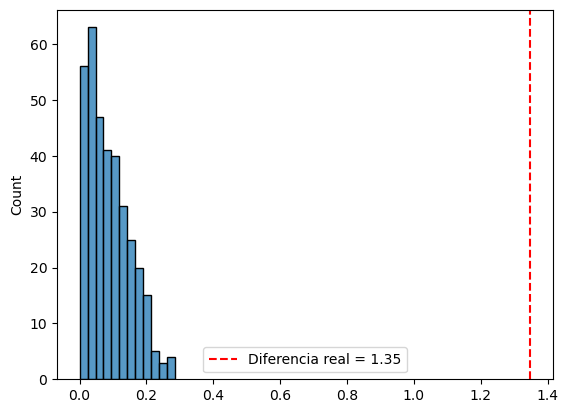

In [11]:
from utils_log import bootstrap_mean_difference_test

# Calcular la diferencia real y el valor p para la variable numérica "Online boarding"
# respecto a la variable binaria "target". Mostrar histograma con diferencias obtenidas.
diferencia_real, p_value = bootstrap_mean_difference_test(df["Online boarding"], df[target], 
                                                   plot_hist=True)

# Mostrar la descripción de la diferencia real y el valor p obtenido.
print(f"Diferencia real en medias de 'Online boarding': {diferencia_real:.2f}")
print(f"Valor p: {p_value:.4f}")

En el histograma mostramos la distribución de las diferencias obtenidas al hacer el proceso de muestreo aleatorio con reemplazo. Fíjate que la media real entre las diferentes categorías esta muy alejada de esta distribución y así lo constata el **valor-p** de $0$ que nos indica la proporción de veces que las diferencias de *bootstrap* son mayores o iguales a la diferencia real en la muestra original.

Lo que haremos ahora será calcular los **valores-p** para todas las columnas numéricas de nuestro conjunto de datos.

In [12]:
# Crear lista "numeric_cols" con columnas numéricas (excluyendo la variable "target").
numeric_cols = [df[col] for col in df.columns if df[col].dtype != "O" and col != target]

# Inicializar listas para almacenar resultados de los p-values.
p_values = {}

# Iterar sobre cada columna numérica para calcular las diferencias en medias y los p-values.
for num_col in numeric_cols:

    # Calcular diferencia en medias y  p-value utilizando la función "bootstrap_mean_difference_test".
    diff, p_value = bootstrap_mean_difference_test(num_col, df[target])
    
    # Agregar los resultados a las listas correspondientes.
    p_values[num_col.name] = round(p_value, 4)

# Mostrar los p-values calculados.
print("P-values para las diferencias en medias:")
p_values

P-values para las diferencias en medias:


{'Age': 0.0,
 'Flight Distance': 0.0,
 'Inflight wifi service': 0.0,
 'Departure/Arrival time convenient': 0.06,
 'Ease of Online booking': 0.0,
 'Gate location': 0.0314,
 'Food and drink': 0.0,
 'Online boarding': 0.0,
 'Seat comfort': 0.0,
 'Inflight entertainment': 0.0,
 'On-board service': 0.0,
 'Leg room service': 0.0,
 'Baggage handling': 0.0,
 'Checkin service': 0.0,
 'Inflight service': 0.0086,
 'Cleanliness': 0.0,
 'Departure Delay in Minutes': 0.0686,
 'Arrival Delay in Minutes': 0.0943}

Vemos que todos los **p-values** son bastante bajos. Los más elevados están en *departure delay in minutes* y en *arrival delay in minutes*. En concreto nos indican que en aproximadamente un 6% de las muestras *falsas* de bootstrap se obtuvo un resultado igual o más extremo que la diferencia real.

Un 9.43% de las veces se obtuvo un resultado tan o más extremo que el real


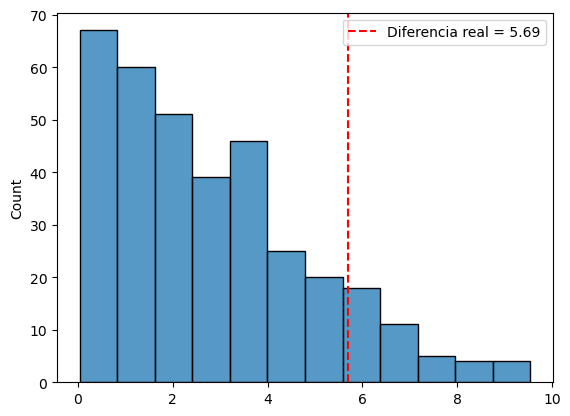

In [13]:
# Representar hist de distribución de diferencias en medias creada por bootstrap
real_diff, p_values = bootstrap_mean_difference_test(df["Arrival Delay in Minutes"], 
                               df[target], 
                               plot_hist=True)

print(f"Un {p_value*100:.2f}% de las veces se obtuvo un resultado tan o más extremo que el real")

## Columnas categóricas vs satisfaction
Ya hemos analizado el peso que las diferentes variables numéricas tienen sobre la variable target. Ahora es momento de analizar las variables categóricas.

Conteo y porcentaje de cada categoría en las columnas categóricas.


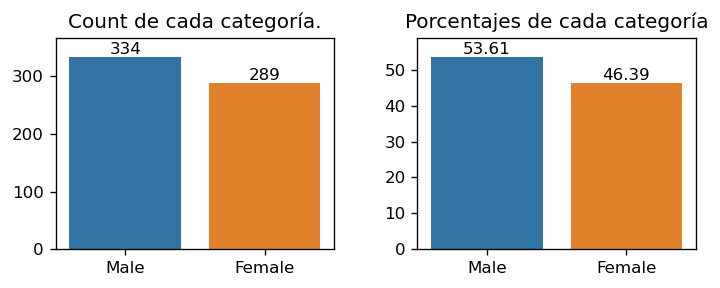

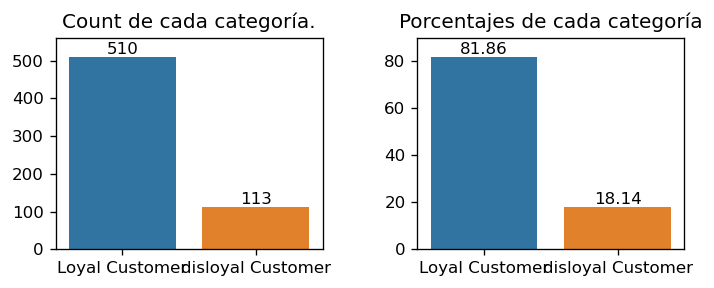

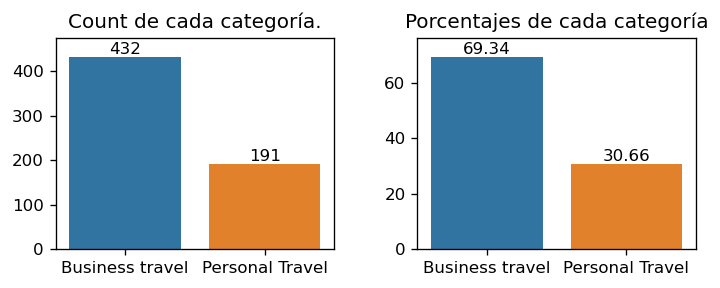

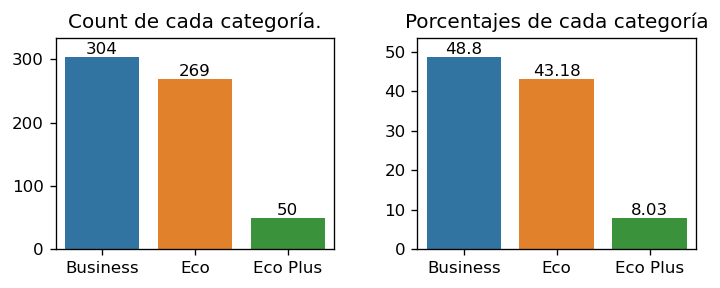

In [14]:
# Crear lista "cate_columns" con columnas categóricas (tipo "object") del DataFrame.
cate_columns = [df[col] for col in df.columns if df[col].dtype == "O"]

# Imprimir descripción de los gráficos generados.
print("Conteo y porcentaje de cada categoría en las columnas categóricas.")

# Iterar sobre cate_columns para generar gráficos de barras de conteo y porcentaje.
for cat_col in cate_columns:
    # Mostrar gráfico de barras para conteo y porcentaje de cada categoría.
    barplot_category_counts_percentages(cat_col, figsize=(6, 2.5), dpi=120)

Con estos gráficos ya podemos observar como se distribuyen las diferentes variables categóricas de nuestro conjunto de datos.

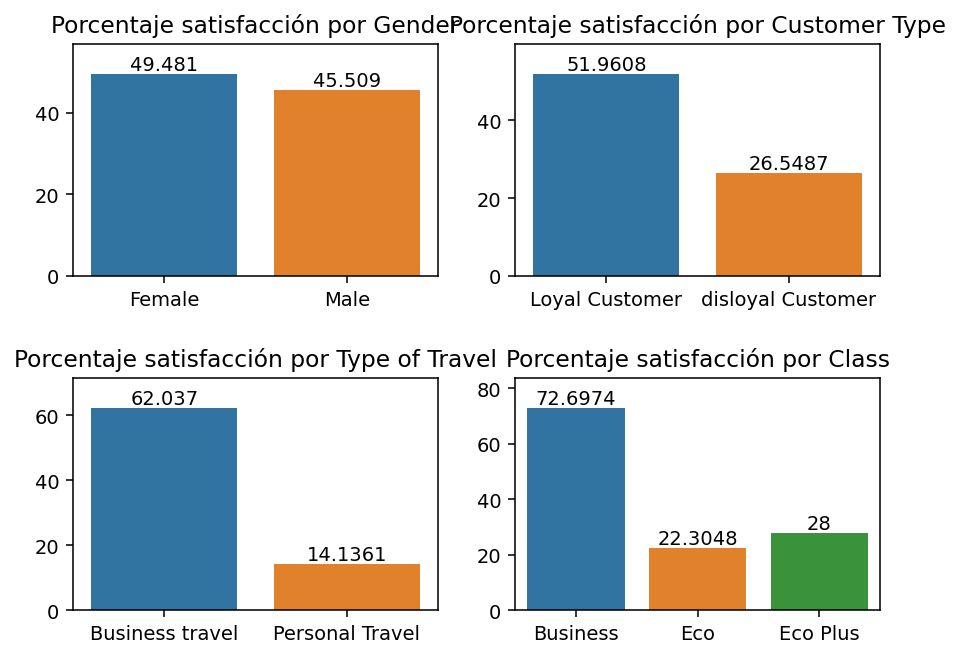

In [15]:
# Crear subplots para mostrar gráficos de barras de porcentaje de satisfacción por categoría.
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=140)

# Iterar sobre cada columna categórica para generar los gráficos.
for index in range(len(cate_columns)):
    # Obtener la columna categórica actual.
    category_column = cate_columns[index]

    # Seleccionar el eje correspondiente para el subplot actual.
    ax = axes[0][index] if index < 2 else axes[1][index - 2]

    # Obtener las categorías únicas de la columna categórica.
    categories = category_column.unique()

    # Calcular los porcentajes de satisfacción para cada categoría.
    porcentajes = []
    for category in categories:
        # Calcular el porcentaje de satisfacción para la categoría actual.
        satisfaction_percent = df[target][category_column == category].sum() / (category_column == category).sum() * 100
        porcentajes.append(satisfaction_percent)

    # Crear el gráfico de barras con los porcentajes de satisfacción.
    bar = sns.barplot(x=categories, y=porcentajes, ax=ax)
    bar.bar_label(bar.containers[0])

    # Asignar título al gráfico.
    bar.set_title(f"Porcentaje satisfacción por {category_column.name}")

    # Ajustar el límite del eje y para mejorar la visualización.
    bar.set_ylim(0, max(porcentajes) + 0.15 * max(porcentajes))

# Ajustar espacios entre subplots.
plt.tight_layout(w_pad=2., h_pad=2.)

Estos gráficos son realmente informativos. En general vemos que las mujeres están más satisfechas con el servivio que los hombres; los **clientes leales** están mucho más satisfechos que los **desleales**; aquellos que han hecho un viaje por trabajo tienen un nivel de satisfacción mucho mayor que aquellos que han realizado un viaje personal y, por último, aquellos que han viajado en Eco o Eco plus en general han quedado mucho menos satisfechos que los que han viajado en business

## Modelo de regresión logística

In [16]:
# Obtener variables predictoras codificadas con "pd.get_dummies" y la variable objetivo "y".
X = pd.get_dummies(df.drop(target, axis=1), drop_first=True)
y = df[target]

# Dividir el conjunto de datos en entrenamiento, validación y prueba.
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos original en entrenamiento (70%) y el resto (30%).
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.7, random_state=101)

# Dividir el conjunto "resto" en validación (50%) y prueba (50%).
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, train_size=0.5, random_state=101)

# Eliminar las variables temporales X_ e y_ para liberar memoria.
del X_, y_

# Mostrar las dimensiones de los conjuntos de datos resultantes.
print("Dimensiones de los conjuntos de datos:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_cv:", X_cv.shape)
print("y_cv:", y_cv.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (436, 23)
y_train: (436,)
X_cv: (93, 23)
y_cv: (93,)
X_test: (94, 23)
y_test: (94,)


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Aplicar Min-Max Scaling a los datos de entrenamiento y validación
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_cv_scaled = pd.DataFrame(scaler.transform(X_cv), columns=X_cv.columns)

# Definir una lista de valores de C para probar
Cs = list(np.linspace(0.01, 1, 200)) + list(np.linspace(1.01, 10, 20))

class_reports = []
for C in Cs:
    # Crear el modelo de regresión logística con regularización L2
    model = LogisticRegression(penalty="l2", C=C)

    # Entrenar el modelo con los datos de entrenamiento escalados
    model.fit(X_train_scaled, y_train)

    # Realizar predicciones en el conjunto de validación escalado
    y_pred_cv = model.predict(X_cv_scaled)

    # Calcular métricas de evaluación y guardar los resultados
    class_report = {
        "C": C,
        "Accuracy": accuracy_score(y_cv, y_pred_cv),
        "Precision": precision_score(y_cv, y_pred_cv),
        "Recall": recall_score(y_cv, y_pred_cv)
    }
    class_reports.append(pd.DataFrame(class_report, index=["Info_Model"]))

# Concatenar los resultados en un DataFrame final
result_df = pd.concat(class_reports)

# Imprimir los resultados ordenados por Accuracy de mayor a menor
result_df_sorted = result_df.sort_values(by="Accuracy", ascending=False)
result_df_sorted


,C,Accuracy,Precision,Recall
Info_Model,0.010000,0.795699,0.914286,0.666667
Info_Model,0.611960,0.784946,0.833333,0.729167
Info_Model,0.567186,0.784946,0.833333,0.729167
Info_Model,0.572161,0.784946,0.833333,0.729167
Info_Model,0.577136,0.784946,0.833333,0.729167
...,...,...,...,...
Info_Model,0.910452,0.763441,0.809524,0.708333
Info_Model,0.915427,0.763441,0.809524,0.708333
Info_Model,0.920402,0.763441,0.795455,0.729167
Info_Model,0.925377,0.763441,0.795455,0.729167


Como podemos observar el modelo que mejor se ha conseguido adaptar al conjunto de datos de cross-validation ha sido aquel cuyo nivel de regularización es $C=0.01$. Cuanto menor sea este parámetro mayor es el nivel de regularización, por tanto, el modelo requiere una regularización elevada para poder **generalizar** bien en datos que nunca ha visto

              precision    recall  f1-score   support

           0       0.72      0.93      0.82        45
           1       0.91      0.67      0.77        48

    accuracy                           0.80        93
   macro avg       0.82      0.80      0.79        93
weighted avg       0.82      0.80      0.79        93

Accuracy: 0.80


<Figure size 768x576 with 0 Axes>

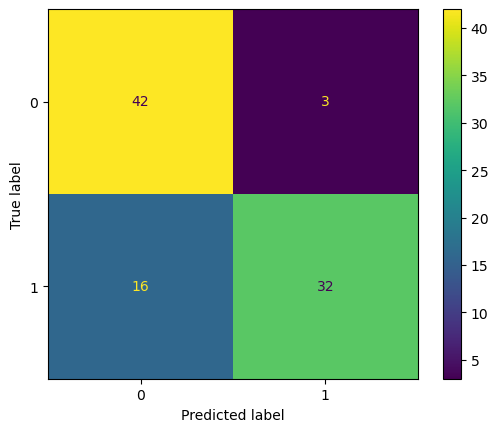

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Crear y entrenar el mejor modelo de regresión logística con regularización L2
best_model = LogisticRegression(penalty="l2", C=0.01)
best_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de validación escalado
y_pred_cv = best_model.predict(X_cv_scaled)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_cv, y_pred_cv)

# Graficar la matriz de confusión
plt.figure(dpi=120)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Imprimir el reporte de clasificación y la precisión
print(classification_report(y_cv, y_pred_cv))
print(f"Accuracy: {accuracy_score(y_cv, y_pred_cv):.2f}")

Pero, ¿cuáles son los parámetros de nuestro modelo?, es decir, ¿qué importancia tuvieron las diferentes variables a la hora de hacer las predicciones? pues lo podemos ver ahora.

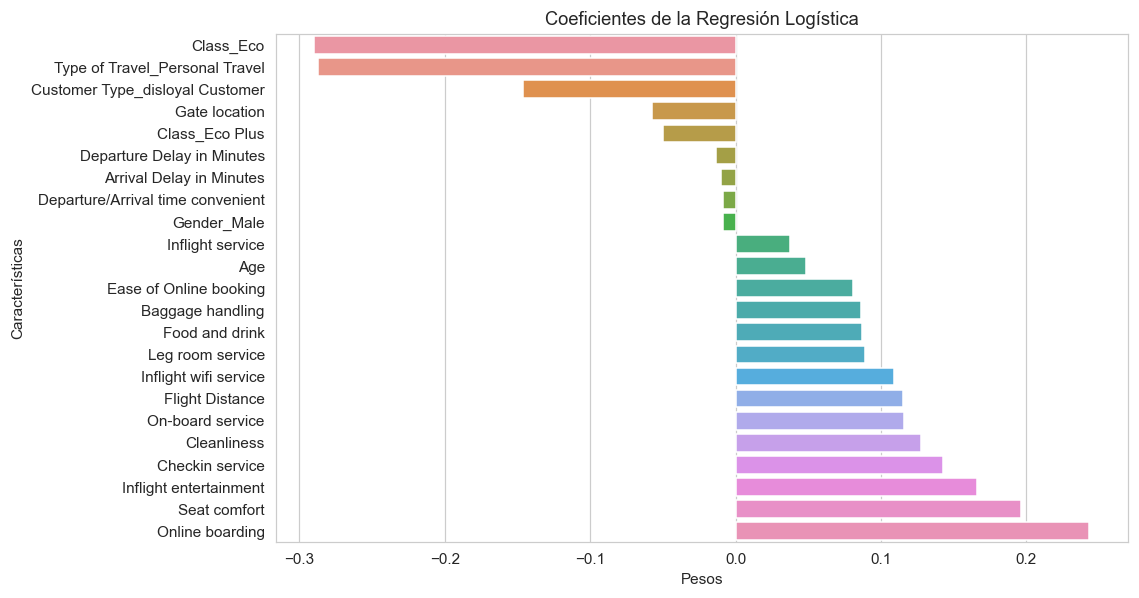

In [33]:
import seaborn as sns

# Crear un DataFrame con los coeficientes del modelo
df_coef = pd.DataFrame(best_model.coef_, columns=X_train.columns, index=["Pesos"]).transpose()
df_coef.sort_values(by="Pesos", inplace=True)

# Graficar los coeficientes en un barplot
plt.figure(dpi=110, figsize=(10, 6))
sns.barplot(y=df_coef.index, x=df_coef["Pesos"])
plt.ylabel("Características")
plt.xlabel("Pesos")
plt.title("Coeficientes de la Regresión Logística");

In [34]:
df_coef

,Pesos
Class_Eco,-0.289760
Type of Travel_Personal Travel,-0.286945
Customer Type_disloyal Customer,-0.146068
Gate location,-0.057539
Class_Eco Plus,-0.050019
Departure Delay in Minutes,-0.013187
Arrival Delay in Minutes,-0.010291
Departure/Arrival time convenient,-0.008888
Gender_Male,-0.008705
Inflight service,0.037569
